In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#Since to input in 2D,But convolution expects height x width x color so expanding dimensions
x_train=np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test, -1)

In [6]:
# Getting number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
x_train.shape[1:]

(28, 28, 1)

In [8]:
#Creating Model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,Input
from tensorflow.keras.models import Model

i=Input(shape=x_train.shape[1:])
x=Conv2D(32,(3,3),activation='relu')(i)
x=Conv2D(64,(3,3),activation='relu')(x)
x=Conv2D(128,(3,3),activation='relu')(x)
x=Conv2D(256,(3,3),activation='relu')(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(10,activation='softmax')(x)
model= Model(inputs=i,outputs=x)


In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 53s 24ms/step - loss: 0.4170 - accuracy: 0.8493 - val_loss: 0.3089 - val_accuracy: 0.8882
Epoch 2/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2630 - accuracy: 0.9035 - val_loss: 0.2676 - val_accuracy: 0.9026
Epoch 3/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2031 - accuracy: 0.9259 - val_loss: 0.2408 - val_accuracy: 0.9158
Epoch 4/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1508 - accuracy: 0.9442 - val_loss: 0.2659 - val_accuracy: 0.9122
Epoch 5/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1078 - accuracy: 0.9606 - val_loss: 0.2937 - val_accuracy: 0.9147
Epoch 6/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0807 - accuracy: 0.9713 - val_loss: 0.3340 - val_accuracy: 0.9148
Epoch 7/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0569 - accuracy: 0.9802 - val_loss: 0.3708 -

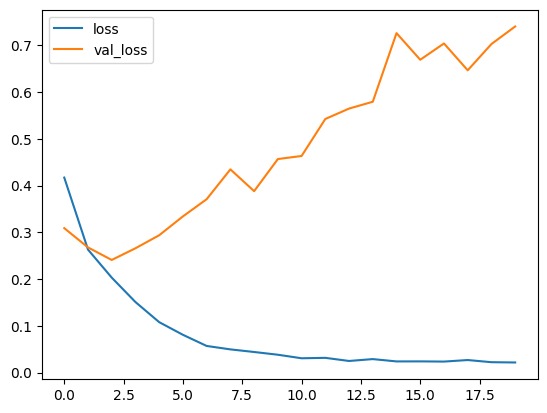

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

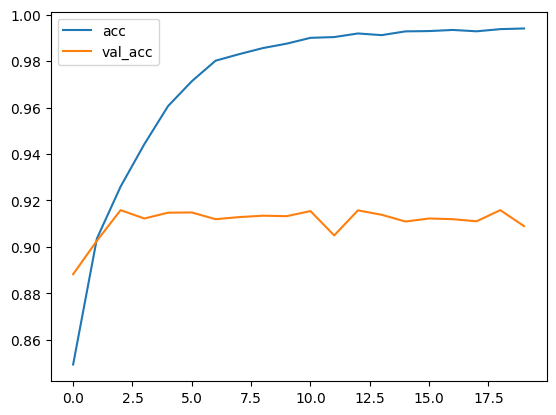

In [12]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
 model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.8846915e-36,
        0.0000000e+00, 1.0000000e+00],
       [7.2002262e-32, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.2486348e-36, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [5.3907211e-26, 1.0000000e+00, 8.1971623e-27, ..., 5.4922411e-27,
        2.0547488e-23, 4.6632673e-27],
       [2.3379803e-18, 3.9267608e-19, 6.3849836e-18, ..., 1.8799016e-12,
        3.1828235e-14, 1.3759225e-11]], dtype=float32)

In [15]:
predicted=model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 4ms/step


In [20]:
print("Manually calculated accuracy:", np.mean(predicted == y_test))

Manually calculated accuracy: 0.9089


In [22]:
print("Evaluate output:", model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.7402 - accuracy: 0.9089
Evaluate output: [0.7402476668357849, 0.9089000225067139]
